# HW1
Author: Arman Hafizi

Student ID: 20954217

## Part I

In [7]:
%cd 'PartI'

/Users/ahafizi/University/2022 3-Fall/CS 885/Assignments/HW1/PartI


In [9]:
from TestMDPmaze import *

- Report the policy, value function and number of iterations needed by value iteration when using a tolerance of 0.01 and starting from a value function set to 0 for all states.

In [10]:
[V,nIterations,epsilon] = mdp.valueIteration(initialV=np.zeros(mdp.nStates),tolerance=0.01)
policy = mdp.extractPolicy(V)
print('Policy: {}\nValue Function: {}\nNumber of Iterations: {}'.format(policy, V, nIterations))

Policy: [3 3 1 1 3 0 1 1 1 3 3 1 3 3 0 2 0]
Value Function: [ 49.67924646  55.27850003  61.57772158  65.87667726  48.0200855
  52.31065     68.14185084  73.25573924  50.22812262  -0.4222639
  77.06685308  81.36369748  66.36297563  76.31445231 100.
  89.90589879   0.        ]
Number of Iterations: 28


- Report the policy, value function and number of iterations needed by policy iteration to find an optimal policy when starting from the policy that chooses action 0 in all states.

In [11]:
[policy,V,nIterations] = mdp.policyIteration(np.zeros(mdp.nStates,dtype=int))
print('Policy: {}\nValue Function: {}\nNumber of Iterations: {}'.format(policy, V, nIterations))

Policy: [3 3 1 1 3 0 1 1 1 3 3 1 3 3 0 2 0]
Value Function: [ 49.69078867  55.28617892  61.58230087  65.87897994  48.03187576
  52.32047965  68.1447605   73.25676304  50.23031164  -0.41942079
  77.06767431  81.36397885  66.36430029  76.31513999 100.
  89.90596733   0.        ]
Number of Iterations: 7


- Report the number of iterations needed by modified policy iteration to converge when varying the number of iterations in partial policy evaluation from 1 to 10. Use a tolerance of 0.01, start with the policy that chooses action 0 in all states and start with the value function that assigns 0 to all states.

In [14]:
iters = []
for i in range(1,11):
    [policy,V,nIterations,epsilon] = mdp.modifiedPolicyIteration(np.zeros(mdp.nStates,dtype=int),np.zeros(mdp.nStates),nEvalIterations=i, tolerance=0.01)
    iters.append(nIterations)
print(iters)

[16, 12, 10, 9, 9, 9, 8, 7, 8, 8]


- Discuss the impact of the number of iterations in partial policy evaluation on the results and relate the results to value iteration and policy iteration. 

Answer: *A lower number of iterations for partial policy evaluation leads to a higher number of total iterations for modified policy iteration because as number of iterations for partial policy evaluation decreases, modified policy iterations acts similarly to value iteration algorithm and as it increases, it acts similarly to policy iteration (faster convergence).*

## Part II

In [1]:
%cd '../PartII'

/Users/ahafizi/University/2022 3-Fall/CS 885/Assignments/HW1/PartII


In [2]:
from TestRLmaze import *

In [3]:
def plots(x, y, label, xlabel, ylabel, title):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8, 3), dpi=320)
    for i in range(len(y)):
        plt.plot(x, y[i], label=label[i])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

- Graph 1: Produce a first graph where the x-axis indicates the episode # (from 0 to 200) and the y-axis indicates the average (based on 100 trials) of the cumulative discounted rewards per episode (100 steps). The graph should contain 3 curves corresponding to the exploration probability epsilon=0.1, 0.3 and 0.5 (set temperature=0). The initial state is 0 and the initial Q-function is 0 for all state-action pairs.

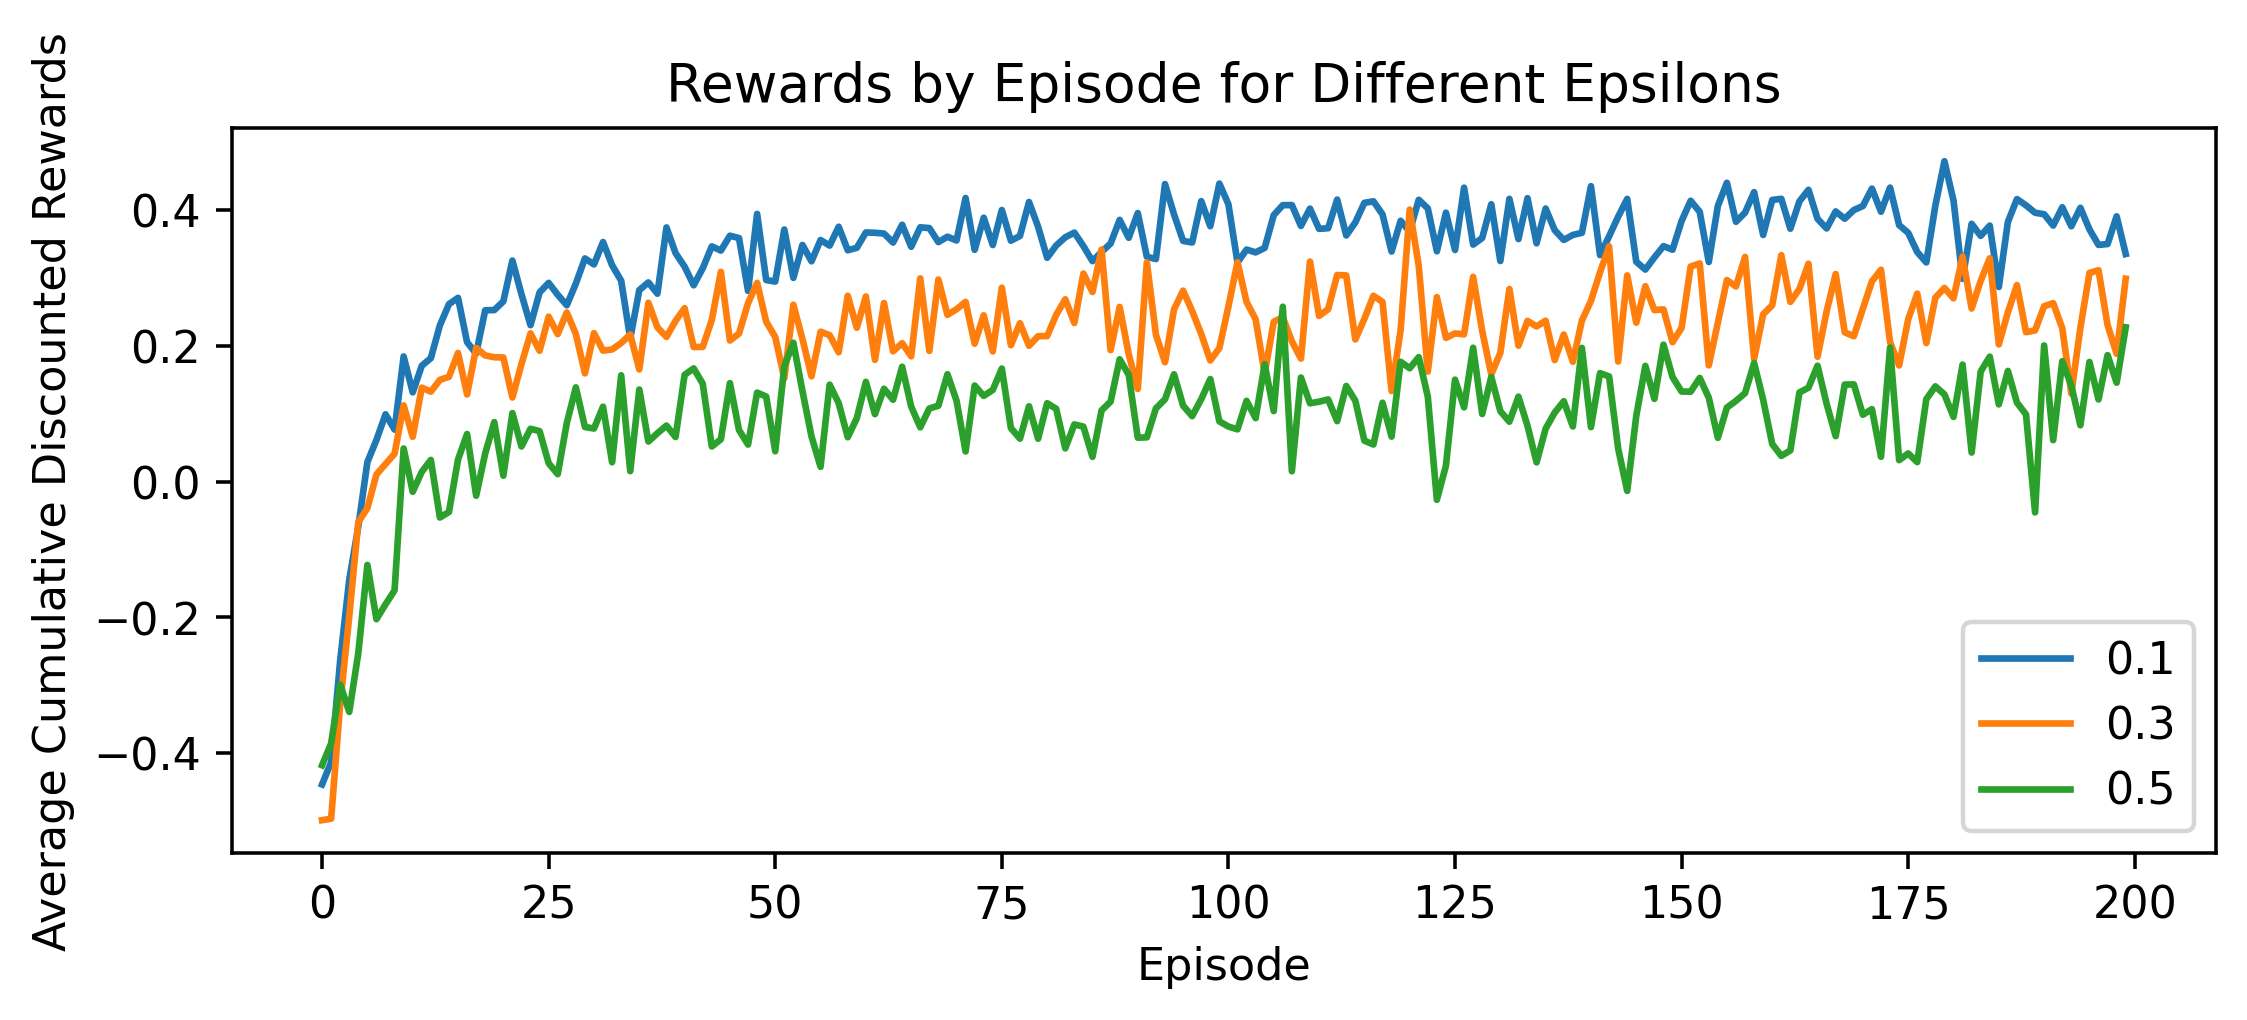

In [4]:
rewards, Qs = {}, {}
epsilons = [0.1, 0.3, 0.5]
trials, episodes, steps = 100, 200, 100
for epsilon in epsilons:
    rewards[epsilon] = 0
    for i in range(trials):
        [Q, policy, r] = rlProblem.qLearning(s0=0,initialQ=np.zeros([mdp.nActions,mdp.nStates]),nEpisodes=episodes,nSteps=steps,epsilon=epsilon,temperature=0)
        rewards[epsilon] += r
    rewards[epsilon] /= trials
plots(list(range(episodes)), list(rewards.values()), epsilons, 'Episode', 'Average Cumulative Discounted Rewards', 'Rewards by Episode for Different Epsilons')

- Graph 2: Produce a second graph where the x-axis indicates the episode # (from 0 to 200) and the y-axis indicates the average (based on 100 trials) of the cumulative discounted rewards per episode (100 steps). The graph should contain 3 curves corresponding to the Boltzmann exploration temperature=0, 10 and 20 (set epsilon=0). The initial state is 0 and the initial Q-function is 0 for all state-action pairs.

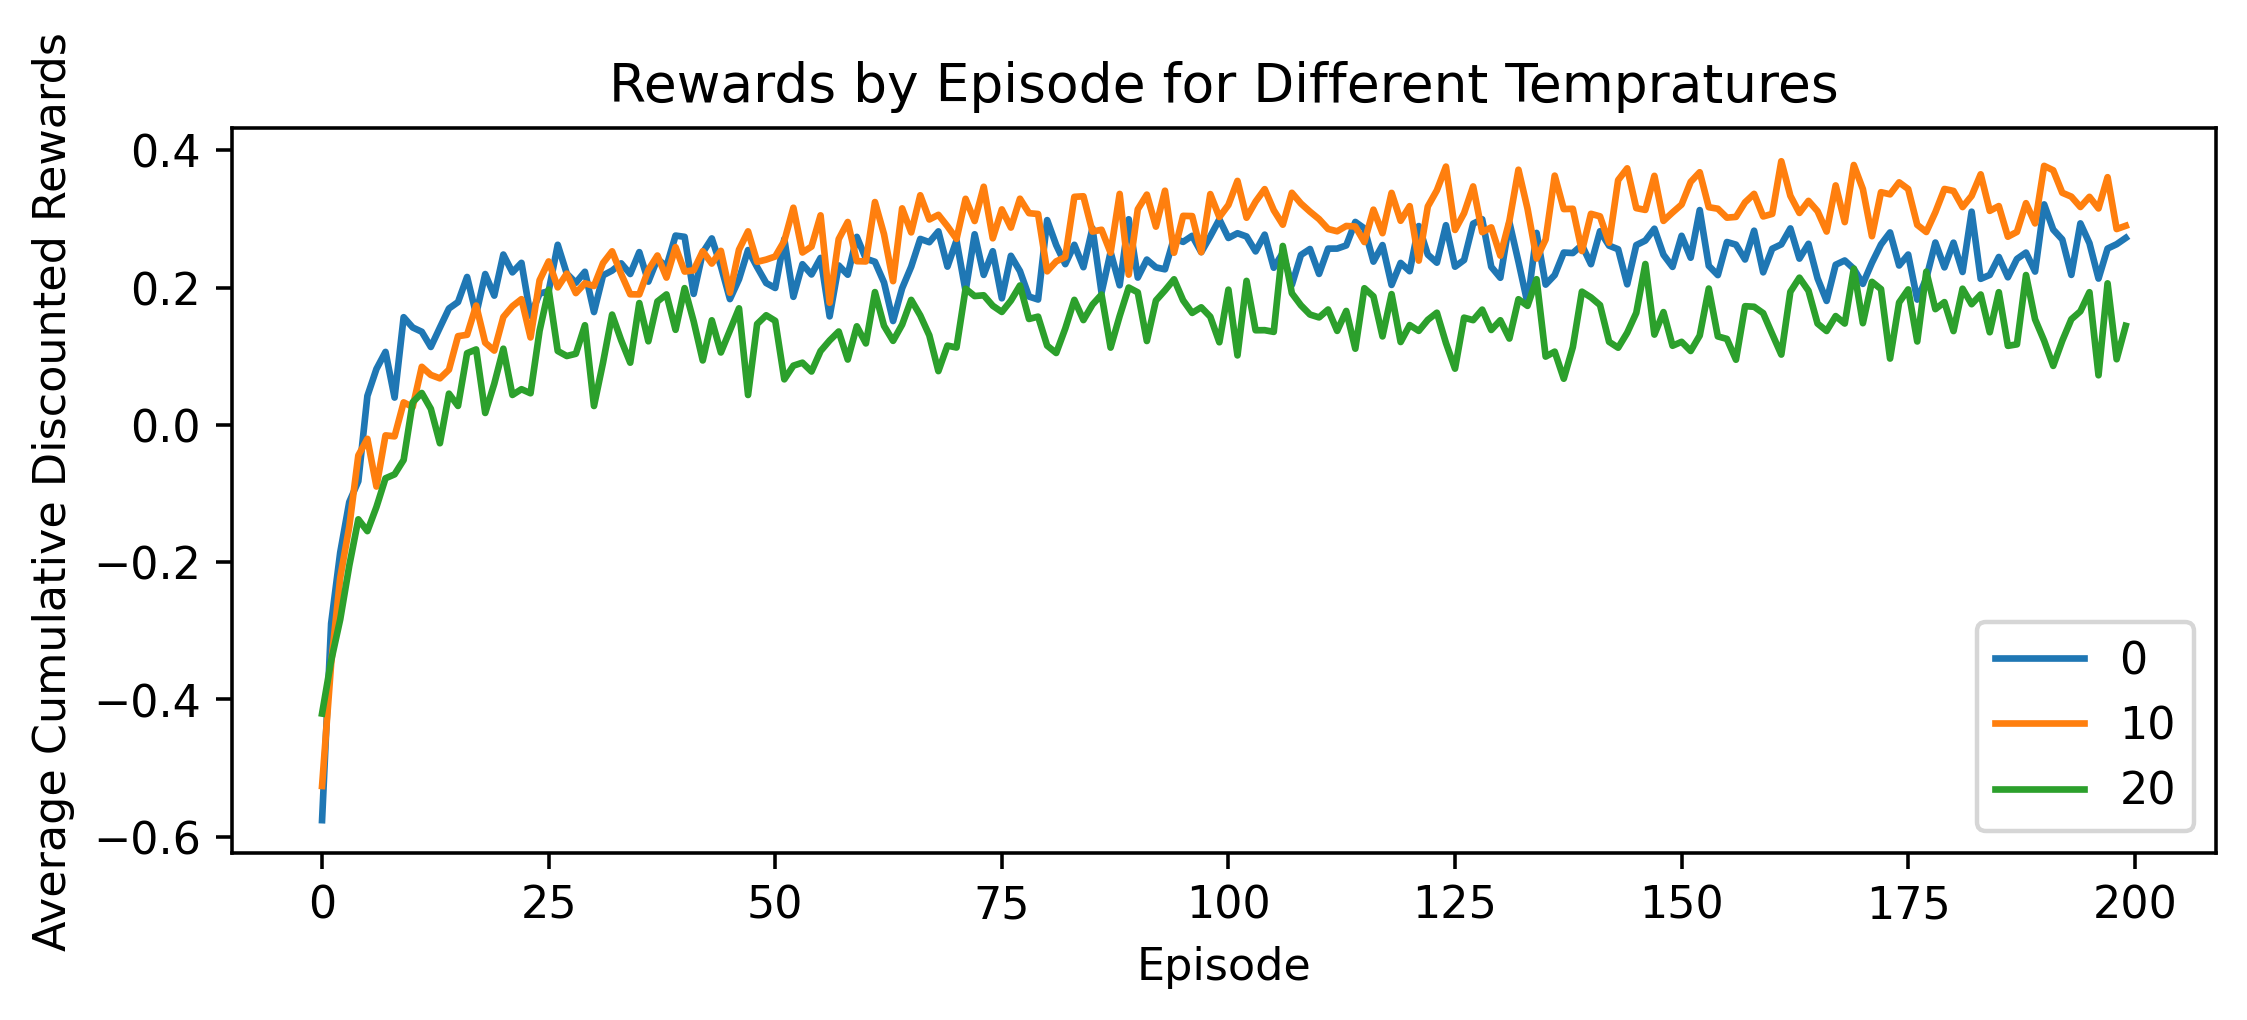

In [5]:
rewards = {}
temperatures = [0, 10, 20]
trials, episodes, steps = 100, 200, 100
for temperature in temperatures:
    rewards[temperature] = 0
    for i in range(trials):
        [Q, policy, r] = rlProblem.qLearning(s0=0,initialQ=np.zeros([mdp.nActions,mdp.nStates]),nEpisodes=episodes,nSteps=steps,epsilon=0,temperature=temperature)
        rewards[temperature] += r
    rewards[temperature] /= trials
plots(list(range(200)), list(rewards.values()), temperatures, 'Episode', 'Average Cumulative Discounted Rewards', 'Rewards by Episode for Different Tempratures')

- Discussion: Explain the impact of the exploration probability epsilon and the Boltzmann temperature on the cumulative discounted rewards per episode earned during training as well as the resulting Q-values and policy.

Answer: *A higher epsilon means more exploration and higher Q values. This exploration comes at the cost of having bad (random) choices which lead to a lower reward. This means that also the policy for lower epsilons are better and more similar to policy iteration.*

*On the other hand, increasing temprature means a slower increment in rewards but a higher reward eventually as a larger temprature may not find the better results in the starting episodes, but it eventually will because it explores more by choosing random actions.*

## Part III

In [1]:
%cd 'PartIII/cs885_a1_part3_code_gym_env_0.26'

/Users/ahafizi/University/2022 3-Fall/CS 885/Assignments/HW1/PartIII/cs885_a1_part3_code_gym_env_0.26


In [6]:
from DQN import *
import DQN

- Target network update frequency: Modify the DQN code provided to produce a graph where the y-axis is the average cumulative reward of the last 25 episodes and the x-axis is the # of episodes up to 300 episodes. The graph should contain 4 curves corresponding to updating the target network every 1, 10 (default), 50, 100 episode(s). To reduce stochasticity in the results, report curves that are the average of 5 runs corresponding to 5 random seeds. Based on the results, explain the impact of the target network and relate the target network to value iteration.

Seed=1
Training:


R25(136.44): 100%|████████████████████████████| 300/300 [00:03<00:00, 82.57it/s]


Training finished!
Seed=2
Training:


R25(83.28): 100%|█████████████████████████████| 300/300 [00:03<00:00, 88.26it/s]


Training finished!
Seed=3
Training:


R25(183.68): 100%|████████████████████████████| 300/300 [00:03<00:00, 80.81it/s]


Training finished!
Seed=4
Training:


R25(125.8): 100%|█████████████████████████████| 300/300 [00:03<00:00, 80.81it/s]


Training finished!
Seed=5
Training:


R25(108.28): 100%|████████████████████████████| 300/300 [00:03<00:00, 85.67it/s]


Training finished!
Seed=1
Training:


R25(156.72): 100%|████████████████████████████| 300/300 [00:04<00:00, 73.00it/s]


Training finished!
Seed=2
Training:


R25(142.56): 100%|████████████████████████████| 300/300 [00:04<00:00, 73.76it/s]


Training finished!
Seed=3
Training:


R25(153.84): 100%|████████████████████████████| 300/300 [00:03<00:00, 76.32it/s]


Training finished!
Seed=4
Training:


R25(184.52): 100%|████████████████████████████| 300/300 [00:04<00:00, 68.15it/s]


Training finished!
Seed=5
Training:


R25(122.04): 100%|████████████████████████████| 300/300 [00:04<00:00, 73.22it/s]


Training finished!
Seed=1
Training:


R25(23.4): 100%|█████████████████████████████| 300/300 [00:02<00:00, 125.53it/s]


Training finished!
Seed=2
Training:


R25(110.24): 100%|███████████████████████████| 300/300 [00:02<00:00, 107.95it/s]


Training finished!
Seed=3
Training:


R25(167.32): 100%|████████████████████████████| 300/300 [00:03<00:00, 89.57it/s]


Training finished!
Seed=4
Training:


R25(110.44): 100%|████████████████████████████| 300/300 [00:03<00:00, 99.55it/s]


Training finished!
Seed=5
Training:


R25(153.88): 100%|███████████████████████████| 300/300 [00:02<00:00, 105.92it/s]


Training finished!
Seed=1
Training:


R25(9.16): 100%|█████████████████████████████| 300/300 [00:02<00:00, 133.76it/s]


Training finished!
Seed=2
Training:


R25(10.08): 100%|████████████████████████████| 300/300 [00:02<00:00, 138.14it/s]


Training finished!
Seed=3
Training:


R25(11.76): 100%|████████████████████████████| 300/300 [00:02<00:00, 133.62it/s]


Training finished!
Seed=4
Training:


R25(11.2): 100%|█████████████████████████████| 300/300 [00:02<00:00, 134.66it/s]


Training finished!
Seed=5
Training:


R25(10.76): 100%|████████████████████████████| 300/300 [00:02<00:00, 138.86it/s]


Training finished!


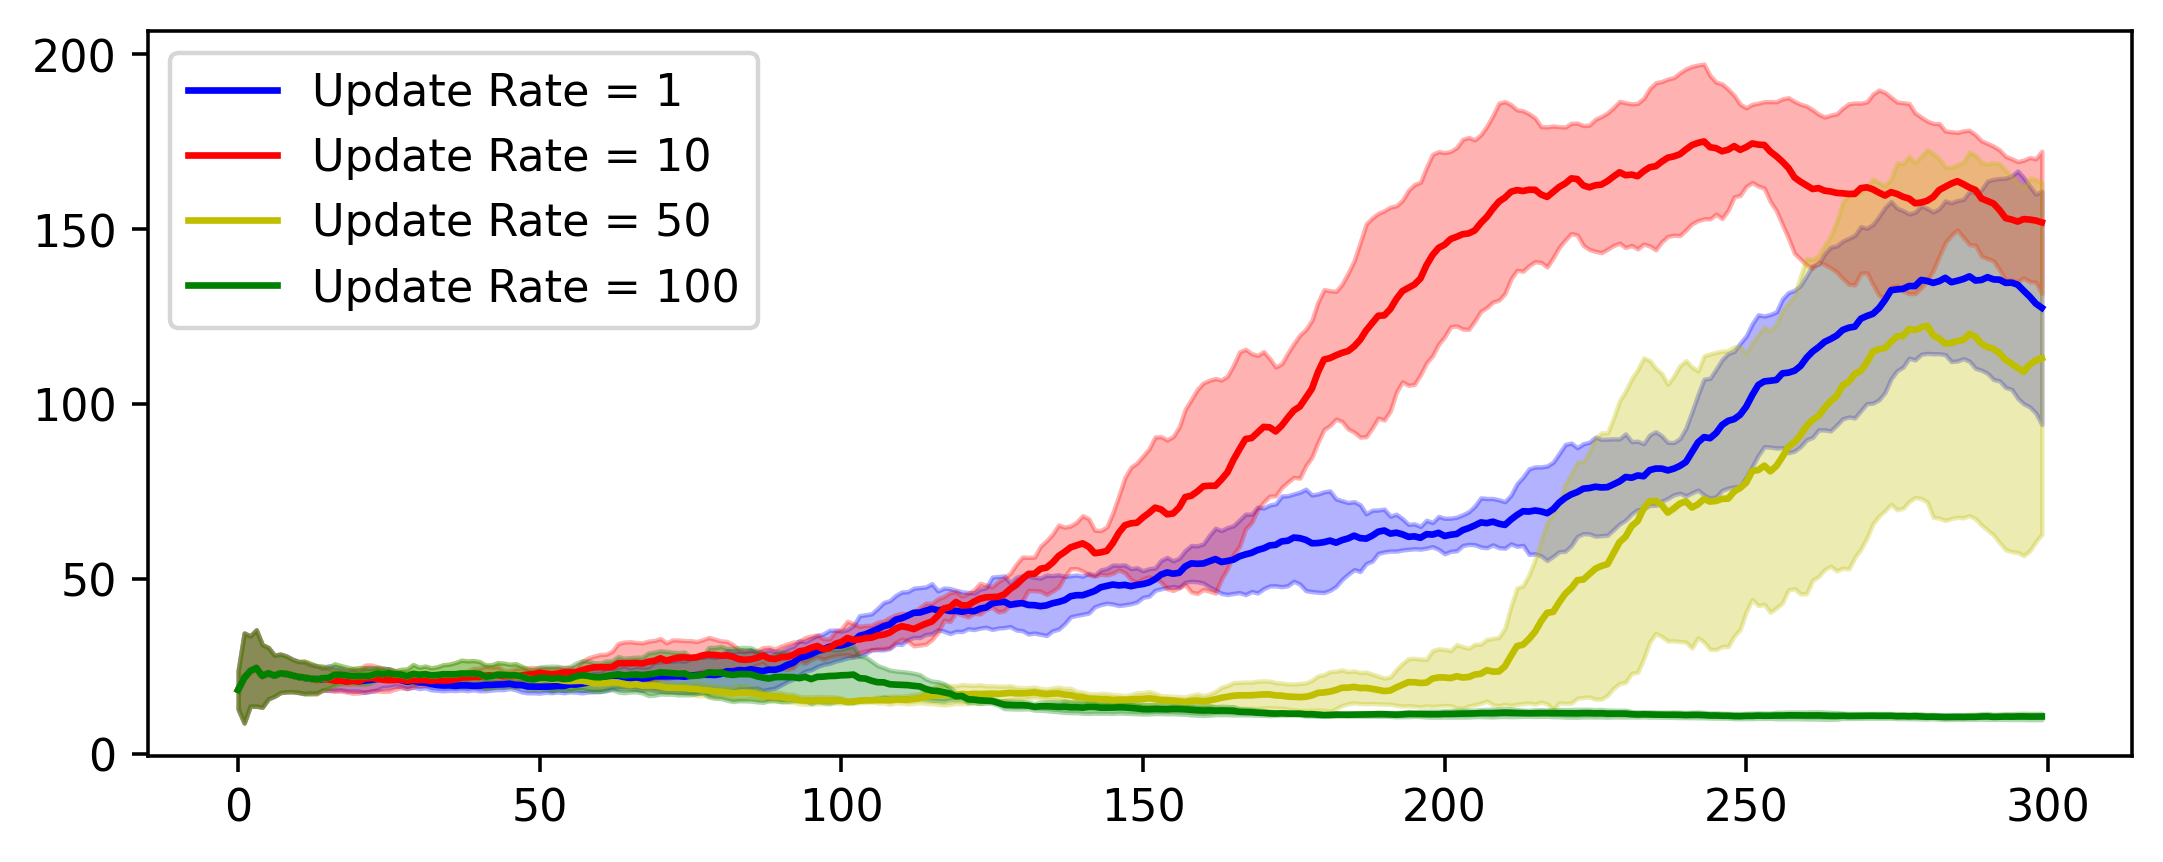

In [12]:
target_update_rates = [1, 10, 50, 100]
colors = ['b', 'r', 'y', 'g']
fig = plt.figure(figsize=(8, 3), dpi=320)
for target_update_rate, color in zip(target_update_rates, colors):
    curves = []
    DQN.TARGET_UPDATE_FREQ = target_update_rate
    for seed in SEEDS:
        curves += [train(seed)]
    # Plot the curve for the given seeds
    plot_arrays(curves, color, label='Update Rate = ' + str(target_update_rate))
plt.legend(loc='best')
plt.show()
DQN.TARGET_UPDATE_FREQ = 10 # restore default value

Answer: *A higher update rate means less updating over time which makes it similar to value iteration. That is why the green plot (rate=100) has a really low rewards. A lower update rate means more iterations and makes it similar to policy iteration that will usually lead to a better reward.*

- Mini-batch size: Modify the DQN code provided to produce a graph where the y-axis is the average cumulative reward of the last 25 episodes and the x-axis is the # of episodes up to 300 episodes. The graph should contain 4 curves corresponding to sampling mini-batches of 1, 10 (default), 50 and 100 experience(s) from the replay buffer. To reduce stochasticity in the results, report curves that are the average of 5 runs corresponding to 5 random seeds. Based on the results, explain the impact of the mini-batch size and relate the replay buffer mini-batch size to exact gradient descent.

Seed=1
Training:


R25(52.76): 100%|████████████████████████████| 300/300 [00:02<00:00, 146.32it/s]


Training finished!
Seed=2
Training:


R25(44.84): 100%|████████████████████████████| 300/300 [00:01<00:00, 155.95it/s]


Training finished!
Seed=3
Training:


R25(31.04): 100%|████████████████████████████| 300/300 [00:01<00:00, 155.79it/s]


Training finished!
Seed=4
Training:


R25(34.2): 100%|█████████████████████████████| 300/300 [00:02<00:00, 148.73it/s]


Training finished!
Seed=5
Training:


R25(35.36): 100%|████████████████████████████| 300/300 [00:01<00:00, 163.18it/s]


Training finished!
Seed=1
Training:


R25(156.72): 100%|████████████████████████████| 300/300 [00:04<00:00, 72.27it/s]


Training finished!
Seed=2
Training:


R25(142.56): 100%|████████████████████████████| 300/300 [00:04<00:00, 73.66it/s]


Training finished!
Seed=3
Training:


R25(153.84): 100%|████████████████████████████| 300/300 [00:03<00:00, 77.24it/s]


Training finished!
Seed=4
Training:


R25(184.52): 100%|████████████████████████████| 300/300 [00:04<00:00, 67.49it/s]


Training finished!
Seed=5
Training:


R25(122.04): 100%|████████████████████████████| 300/300 [00:04<00:00, 74.68it/s]


Training finished!
Seed=1
Training:


R25(191.84): 100%|████████████████████████████| 300/300 [00:05<00:00, 52.10it/s]


Training finished!
Seed=2
Training:


R25(193.76): 100%|████████████████████████████| 300/300 [00:05<00:00, 54.67it/s]


Training finished!
Seed=3
Training:


R25(185): 100%|███████████████████████████████| 300/300 [00:05<00:00, 54.62it/s]


Training finished!
Seed=4
Training:


R25(175.8): 100%|█████████████████████████████| 300/300 [00:05<00:00, 52.25it/s]


Training finished!
Seed=5
Training:


R25(191.4): 100%|█████████████████████████████| 300/300 [00:05<00:00, 52.40it/s]


Training finished!
Seed=1
Training:


R25(178): 100%|███████████████████████████████| 300/300 [00:06<00:00, 47.34it/s]


Training finished!
Seed=2
Training:


R25(195.36): 100%|████████████████████████████| 300/300 [00:06<00:00, 46.76it/s]


Training finished!
Seed=3
Training:


R25(198.16): 100%|████████████████████████████| 300/300 [00:06<00:00, 46.09it/s]


Training finished!
Seed=4
Training:


R25(178.76): 100%|████████████████████████████| 300/300 [00:06<00:00, 47.53it/s]


Training finished!
Seed=5
Training:


R25(180.6): 100%|█████████████████████████████| 300/300 [00:06<00:00, 46.97it/s]


Training finished!


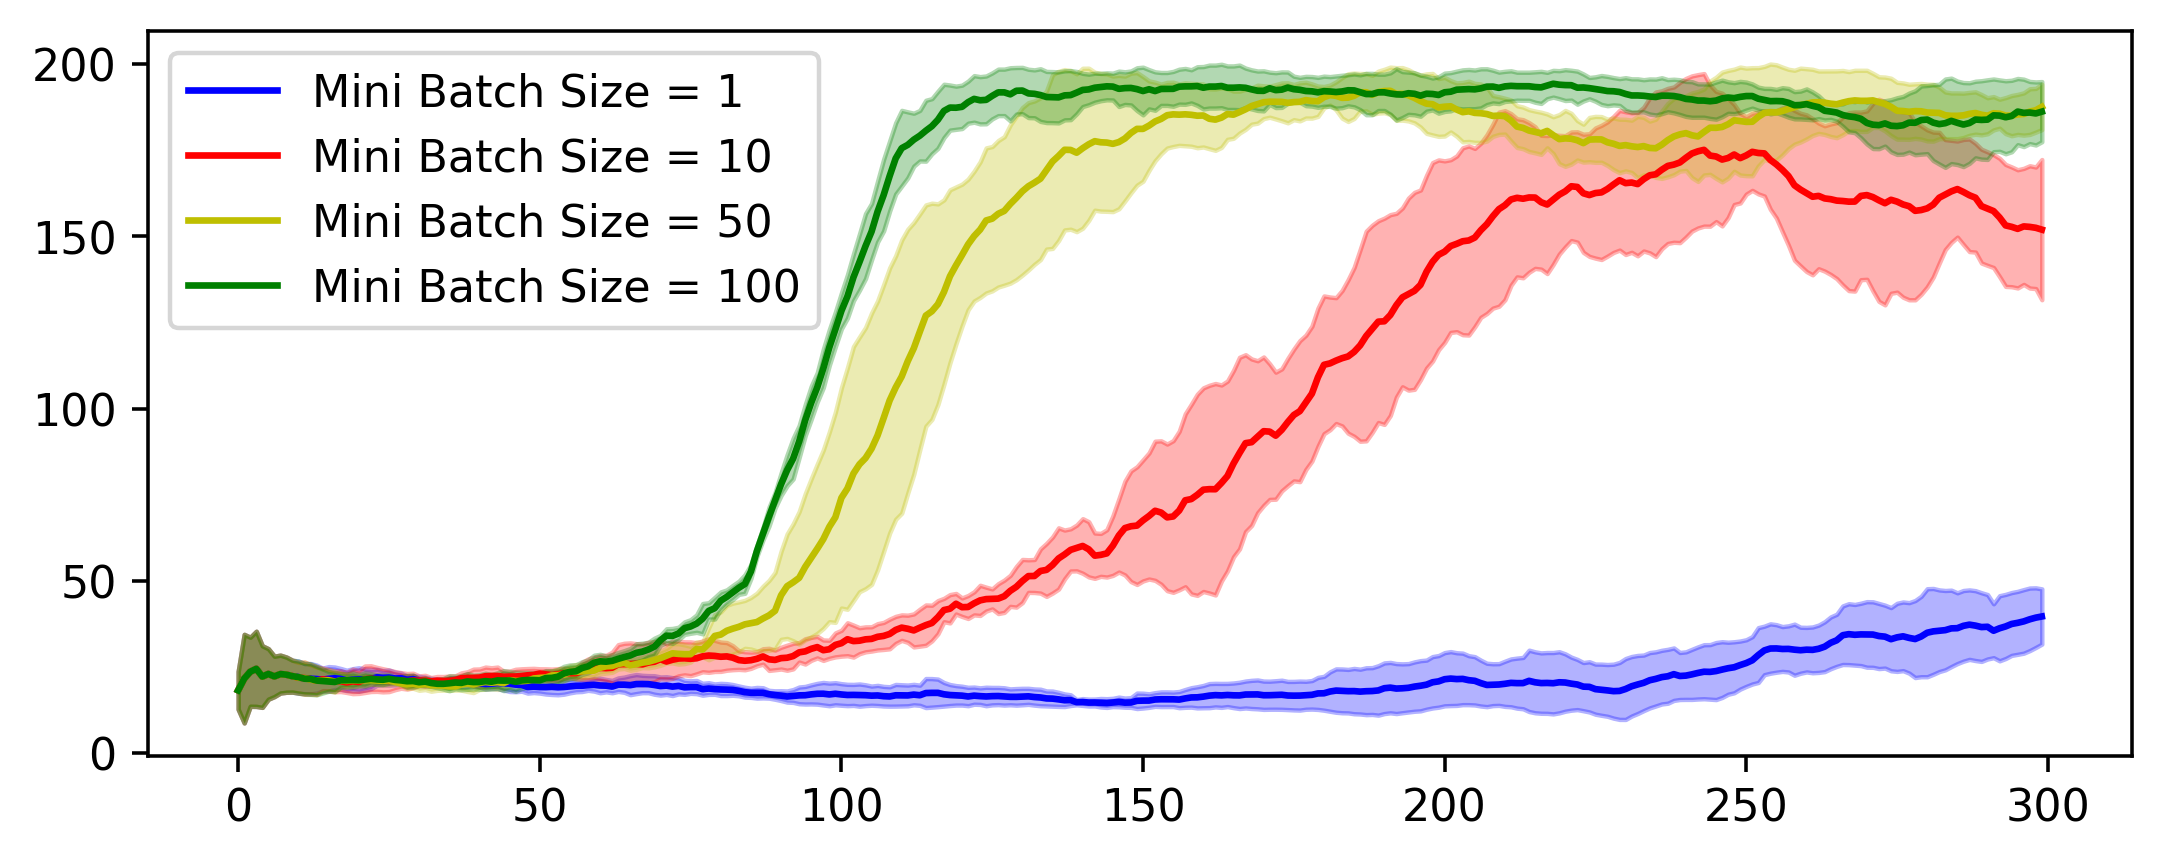

In [11]:
mini_batch_sizes = [1, 10, 50, 100]
colors = ['b', 'r', 'y', 'g']
fig = plt.figure(figsize=(8, 3), dpi=320)
for mini_batch_size, color in zip(mini_batch_sizes, colors):
    curves = []
    DQN.MINIBATCH_SIZE = mini_batch_size
    for seed in SEEDS:
        curves += [train(seed)]
    # Plot the curve for the given seeds
    plot_arrays(curves, color, label='Mini Batch Size = ' + str(mini_batch_size))
plt.legend(loc='best')
plt.show()
DQN.MINIBATCH_SIZE = 10 # restore default value

Answer: *Increasing the batch size means a higher update rate and more work which eventually lead to a higher reward. Generally, deep learning models become more robust with a larger minibatch size. That is due to a wider space exploration in the gradient descent algorithm.*

 - Replay buffer training epochs: Modify the DQN code provided to produce a graph where the y-axis is the average cumulative reward of the last 25 episodes and the x-axis is the # of episodes up to 300 episodes. The graph should contain 4 curves corresponding to training for 1, 5, 10 and 50 epochs with the replay buffer between each episode. To reduce stochasticity in the results, report curves that are the average of 5 runs corresponding to 5 random seeds. Based on the results, explain the impact of the number of training epochs per episode and explain similarities/differences between the number of training epochs and the mini-batch size.

Seed=1
Training:


R25(45.36): 100%|████████████████████████████| 300/300 [00:01<00:00, 274.77it/s]


Training finished!
Seed=2
Training:


R25(12.72): 100%|████████████████████████████| 300/300 [00:00<00:00, 314.32it/s]


Training finished!
Seed=3
Training:


R25(53.24): 100%|████████████████████████████| 300/300 [00:01<00:00, 247.73it/s]


Training finished!
Seed=4
Training:


R25(37.56): 100%|████████████████████████████| 300/300 [00:01<00:00, 243.71it/s]


Training finished!
Seed=5
Training:


R25(56.8): 100%|█████████████████████████████| 300/300 [00:01<00:00, 263.97it/s]


Training finished!
Seed=1
Training:


R25(156.72): 100%|████████████████████████████| 300/300 [00:04<00:00, 72.73it/s]


Training finished!
Seed=2
Training:


R25(142.56): 100%|████████████████████████████| 300/300 [00:04<00:00, 71.37it/s]


Training finished!
Seed=3
Training:


R25(153.84): 100%|████████████████████████████| 300/300 [00:03<00:00, 75.59it/s]


Training finished!
Seed=4
Training:


R25(184.52): 100%|████████████████████████████| 300/300 [00:04<00:00, 65.96it/s]


Training finished!
Seed=5
Training:


R25(122.04): 100%|████████████████████████████| 300/300 [00:04<00:00, 71.79it/s]


Training finished!
Seed=1
Training:


R25(162.68): 100%|████████████████████████████| 300/300 [00:06<00:00, 46.20it/s]


Training finished!
Seed=2
Training:


R25(183.4): 100%|█████████████████████████████| 300/300 [00:06<00:00, 44.44it/s]


Training finished!
Seed=3
Training:


R25(161.88): 100%|████████████████████████████| 300/300 [00:06<00:00, 43.41it/s]


Training finished!
Seed=4
Training:


R25(159.52): 100%|████████████████████████████| 300/300 [00:06<00:00, 44.50it/s]


Training finished!
Seed=5
Training:


R25(190.32): 100%|████████████████████████████| 300/300 [00:06<00:00, 46.89it/s]


Training finished!
Seed=1
Training:


R25(179.8): 100%|█████████████████████████████| 300/300 [00:20<00:00, 14.86it/s]


Training finished!
Seed=2
Training:


R25(173.72): 100%|████████████████████████████| 300/300 [00:20<00:00, 14.44it/s]


Training finished!
Seed=3
Training:


R25(190.8): 100%|█████████████████████████████| 300/300 [00:19<00:00, 15.11it/s]


Training finished!
Seed=4
Training:


R25(167.72): 100%|████████████████████████████| 300/300 [00:20<00:00, 14.73it/s]


Training finished!
Seed=5
Training:


R25(192.36): 100%|████████████████████████████| 300/300 [00:20<00:00, 14.97it/s]


Training finished!


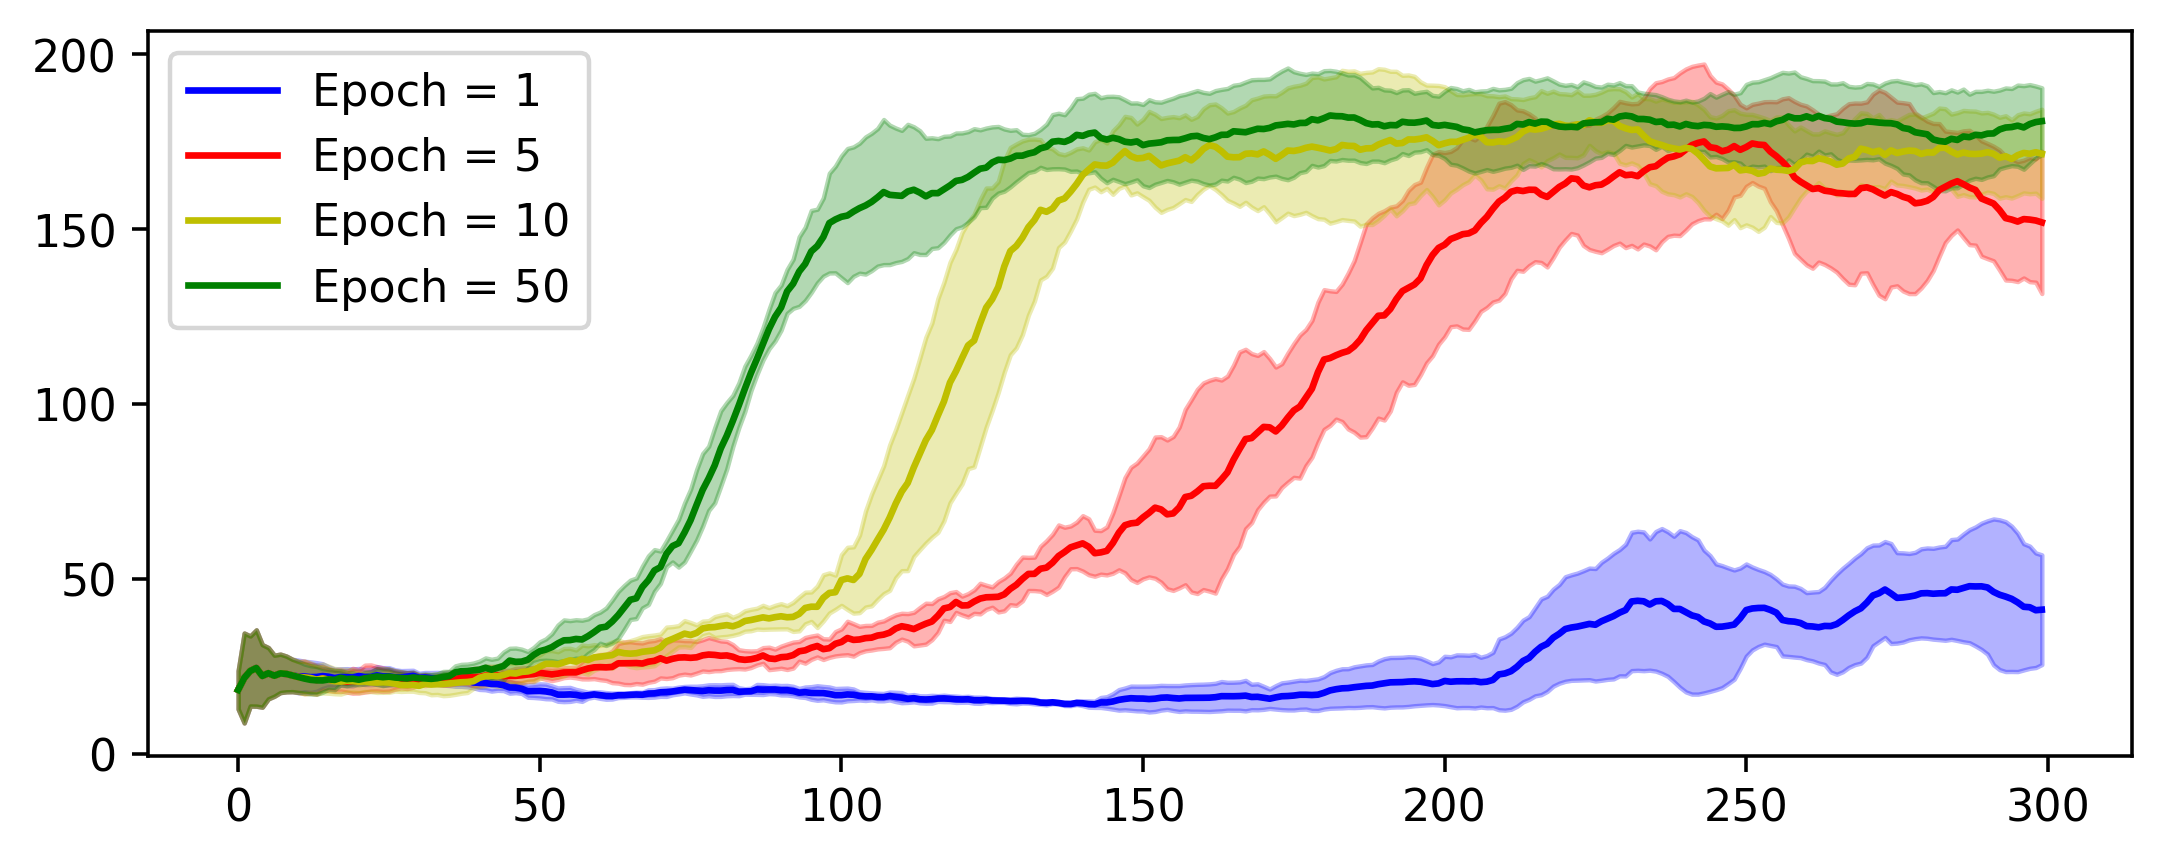

In [13]:
epochs = [1, 5, 10, 50]
colors = ['b', 'r', 'y', 'g']
fig = plt.figure(figsize=(8, 3), dpi=320)
for epoch, color in zip(epochs, colors):
    curves = []
    DQN.TRAIN_EPOCHS = epoch
    for seed in SEEDS:
        curves += [train(seed)]
    # Plot the curve for the given seeds
    plot_arrays(curves, color, label='Epoch = ' + str(epoch))
plt.legend(loc='best')
plt.show()
DQN.TRAIN_EPOCHS = 5 # restore default value

Answer: *Increasing the number of epochs mostly lead to a robust method as long as there is no test phase (we might overfit the model on train data). This is due to going over the whole data over and over to explore more possibilites. This makes it similar to the minibatch size for RL models as it tries to explore the states space.*